In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau , ModelCheckpoint
from keras.applications.mobilenet import MobileNet ,preprocess_input

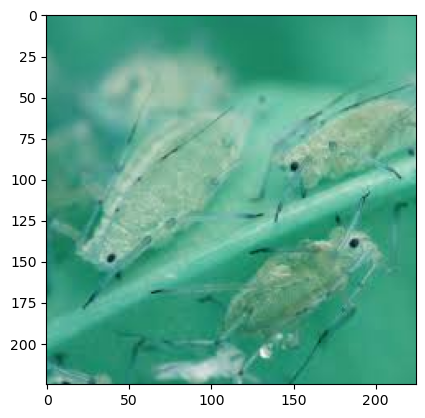

In [19]:
img=cv2.imread('pest/train/aphids/jpg_0 - Copy (2).jpg')
plt.imshow(img)
plt.show()


In [20]:
img=np.array(img)
img.shape

(225, 225, 3)

In [21]:
train_dir='pest/train'
test_dir='pest/test'

training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.2,#0.1
    shear_range=20,#0.1
    zoom_range=0.8,#0.1
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.2,#0.1
    shear_range=20,#0.1
    zoom_range=0.8,#0.1
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset='validation',shuffle=True)

testing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
).flow_from_directory(test_dir,batch_size=16,target_size=(224,224),shuffle=True)


Found 2565 images belonging to 9 classes.
Found 135 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [22]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [23]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99,
                 epsilon=1e-8) 

In [24]:
# EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
# Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
# callback=[EarlyStop , Reduce_LR]


In [25]:
mobilenet.trainable=False

In [26]:


model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,600,841 (21.37 MB)

 Trainable params: 2,367,369 (9.03 MB)

 Non-trainable params: 3,233,472 (12.33 MB)

In [28]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [29]:
print(type(training))  # Should be a valid format like np.ndarray or tf.data.Dataset
print(type(validing))


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


In [30]:
history = model.fit(training, validation_data=validing, epochs=40, batch_size=32,
                    steps_per_epoch=None, validation_steps=None, verbose=2)

Epoch 1/40
161/161 - 99s - 616ms/step - accuracy: 0.4191 - loss: 1.7621 - val_accuracy: 0.4889 - val_loss: 1.5145
Epoch 2/40
161/161 - 98s - 611ms/step - accuracy: 0.5891 - loss: 1.2308 - val_accuracy: 0.6148 - val_loss: 1.5138
Epoch 3/40
161/161 - 99s - 614ms/step - accuracy: 0.6097 - loss: 1.1660 - val_accuracy: 0.6000 - val_loss: 1.4329
Epoch 4/40
161/161 - 96s - 596ms/step - accuracy: 0.6487 - loss: 1.0521 - val_accuracy: 0.6296 - val_loss: 1.4639
Epoch 5/40
161/161 - 62s - 383ms/step - accuracy: 0.6706 - loss: 1.0158 - val_accuracy: 0.6370 - val_loss: 1.1285
Epoch 6/40
161/161 - 96s - 594ms/step - accuracy: 0.6713 - loss: 0.9665 - val_accuracy: 0.5333 - val_loss: 1.5047
Epoch 7/40
161/161 - 100s - 618ms/step - accuracy: 0.7002 - loss: 0.8952 - val_accuracy: 0.6815 - val_loss: 1.1589
Epoch 8/40
161/161 - 99s - 616ms/step - accuracy: 0.7146 - loss: 0.8449 - val_accuracy: 0.6296 - val_loss: 1.2863
Epoch 9/40
161/161 - 98s - 609ms/step - accuracy: 0.7185 - loss: 0.8255 - val_accuracy:

In [35]:
loss , acc = model.evaluate(testing)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.9604 - loss: 0.1936


In [36]:
print(loss)
print(acc*100)

0.1562967300415039
95.77777981758118


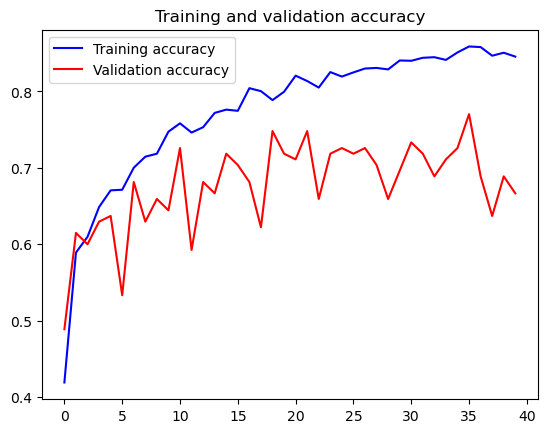

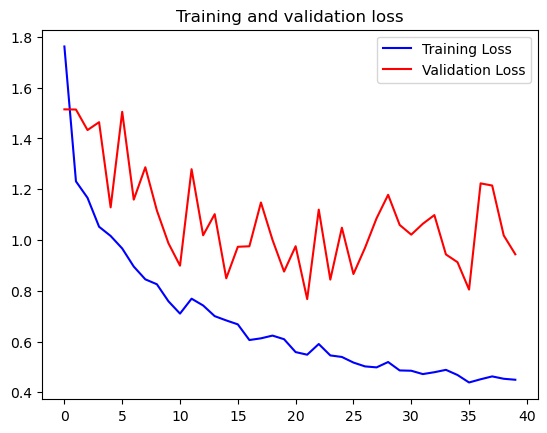

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
import tensorflow as tf
import pickle
from tensorflow.keras.models import model_from_json

# Convert the model to JSON format and extract weights
model_data = {
    "model_json": model.to_json(),  # Save model architecture
    "weights": model.get_weights()   # Save model weights as a list of NumPy arrays
}

# Save the model data using pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "pest/train/armyworm/jpg_0 - Copy (2).jpg"

# Load the image and preprocess it
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Apply MobileNet preprocessing

# Make a prediction
prediction = model.predict(img_array)
print("Predicted class:", np.argmax(prediction)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Predicted class: 1


In [39]:
model.save("pest_classifier.h5")


In [41]:
model.save("pest_classifier2.keras")
